<a href="https://colab.research.google.com/github/beastkp/Predictions/blob/main/Boston_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston
load_boston = load_boston()
X = load_boston.data
y = load_boston.target

data = pd.DataFrame(X,columns=load_boston.feature_names)
data["Saleprice"] = y
data.head()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Saleprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
print(load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(data.shape)

(506, 14)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  Saleprice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Saleprice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#EDA

In [8]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
Saleprice    0
dtype: int64

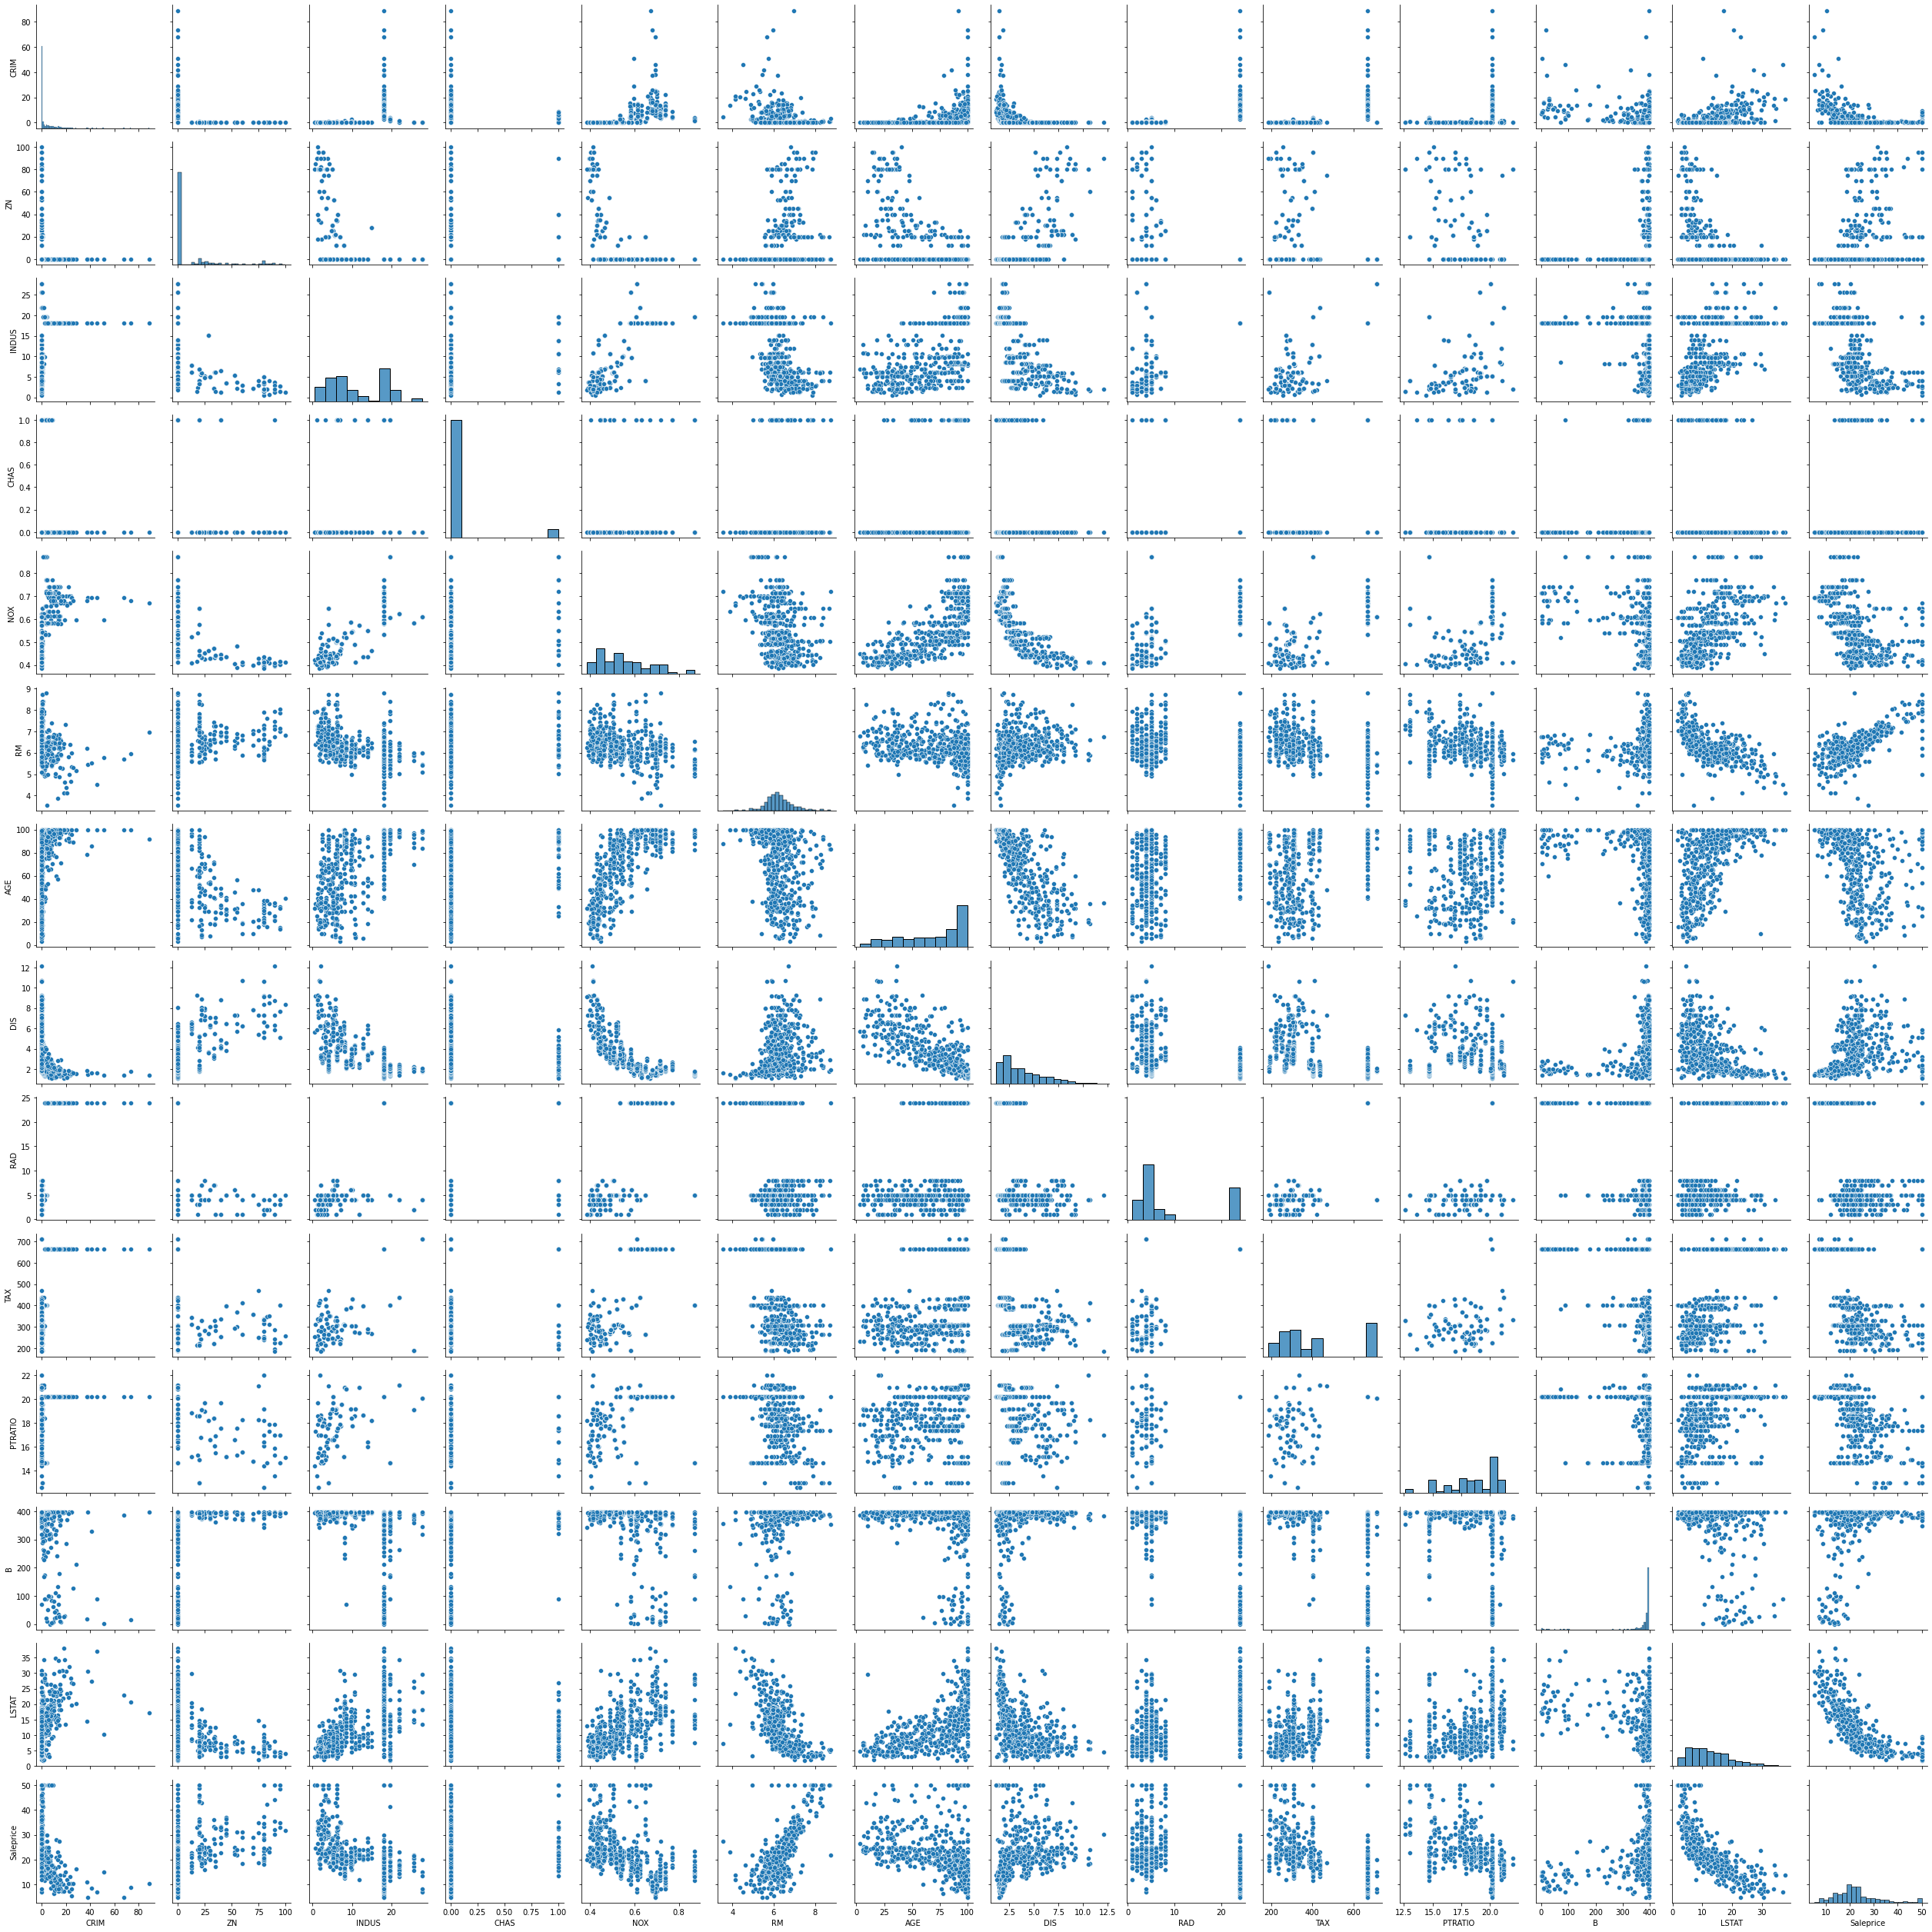

In [9]:
sns.pairplot(data,height=2.5) # plots everything with respect to our features 
plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


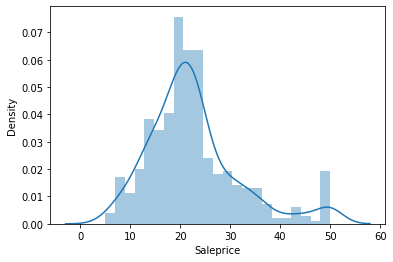

In [10]:
sns.distplot(data['Saleprice']);
#The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. 
#this will show that the data is positive skewed (right skewed)

In [11]:
print("Skeweness: %f" % data['Saleprice'].skew())
print("Kurtosis: %f"% data['Saleprice'].kurt()) #helps to find outliers

Skeweness: 1.108098
Kurtosis: 1.495197


In [12]:
data['Saleprice'].shape

(506,)

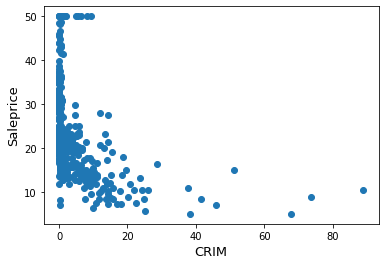

In [13]:
fix,ax = plt.subplots()
ax.scatter(x=data['CRIM'], y= data['Saleprice'])
plt.xlabel('CRIM',fontsize=13)
plt.ylabel('Saleprice',fontsize=13)
plt.show() # areas where crime is more house prices are less

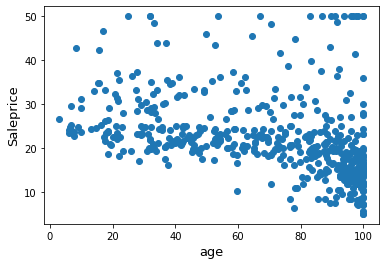

In [15]:
fix,ax = plt.subplots()
ax.scatter(x=data['AGE'],y=data['Saleprice'])
plt.xlabel('age',fontsize= 13)
plt.ylabel('Saleprice',fontsize=13)
plt.show() #older houses have relatively lesser price than newer ones

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu= 22.53 and sigma = 9.19



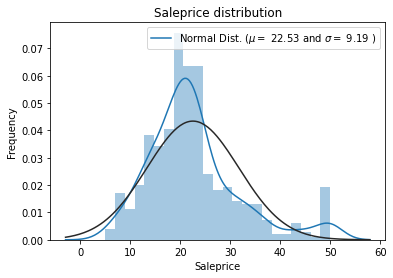

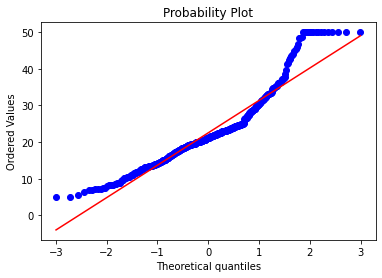

In [16]:
from scipy import stats
from scipy.stats import norm,skew
sns.distplot(data['Saleprice'],fit=norm)
(mu,sigma) = norm.fit(data['Saleprice'])
print('\n mu= {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Saleprice distribution')

#QQ plot
fig = plt.figure()
res = stats.probplot(data['Saleprice'],plot=plt)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu= 1.40 and sigma = 0.10



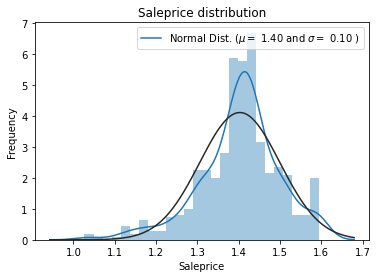

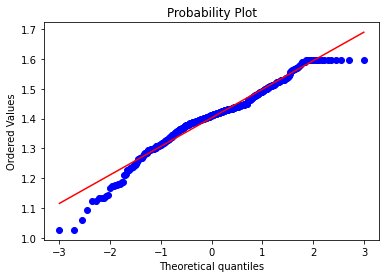

In [18]:
data['Saleprice'] = np.log1p(data['Saleprice'])
sns.distplot(data['Saleprice'],fit=norm)

(mu,sigma) = norm.fit(data['Saleprice'])
print('\n mu= {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Saleprice distribution')

#QQ plot
fig = plt.figure()
res = stats.probplot(data['Saleprice'],plot=plt)
plt.show()

#Data Correlation

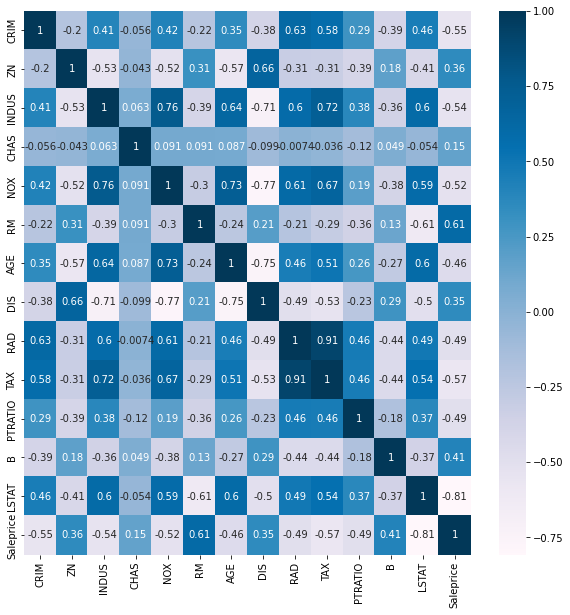

In [19]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
plt.show()

In [22]:
cor_target = abs(cor['Saleprice']) 
# when you have highly corelated features it is better to use only one from the 2 features that is co-related drop other columns as this will affect the model
relevant_features= cor_target[cor_target>0.2] #higly corelated features
names = [index for index, value in relevant_features.iteritems()] # getting names of features

names.remove('Saleprice')

print(names)
print(len(names))

#here we can delete the rest of the columns except these 12

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


#Model Building

In [23]:
from sklearn.model_selection import train_test_split

X = data.drop('Saleprice',axis=1)
y = data['Saleprice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#test_size should be between 0 and 1 it shows percent of data to be tested, The random state hyperparameter in the train_test_split() function controls the 
# shuffling process. we get lower mean square error with higher value of random state but it is good to use many random_state values and get the average of all

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #intantiate regression
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
predictions = lr.predict(X_test)
print("Actual value of the house:- ",y_test[0])
print("Model Predicted Value:- ",predictions[0])

Actual value of the house:-  1.4395687003478856
Model Predicted Value:-  1.4728579371016663


In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)
print(rmse)

0.04764260260050869
